# Etapa ? - Regressão
### Predição de nota média do ENEM para uma determinada instituição com base no conjunto de dados de seus alunos

### Etapas
1. Pegar todos os alunos de uma escola específica
2. Calcular a média do ENEM de cada um
3. Treinar um regressor para predizer a nota média de ENEM de um aluno jamais visto antes
4. Já sabemos a nota prevista de um dado aluno no ENEM.
5. Para transformar isso em nota média da escola, deve-se pegar N alunos, prever para todos e dividir por N.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, BayesianRidge, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as MSE # MSE(true, pred)
from sklearn.model_selection import train_test_split
import xgboost as xg
import matplotlib.pyplot as plt
%matplotlib inline

/home/lucas/Desktop/SADEM/venv/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('limpeza1.csv', encoding='latin1')

In [3]:
ESCOLA = 23064684 # 582 alunos

In [4]:
dfe = df.copy() # df[df['escola'] == ESCOLA]
print(dfe.columns)

Index(['id', 'uf', 'idade', 'sexo', 'etnia', 'n_cn', 'n_ch', 'n_lc', 'n_mt',
       'n_r1', 'n_r2', 'n_r3', 'n_r4', 'n_r', 'escolaridade_pai',
       'escolaridade_mae', 'emprego_pai', 'emprego_mae', 'pessoas_casa',
       'renda', 'quartos', 'carros', 'motos', 'celulares', 'computadores',
       'internet', 'cidade_nat', 'uf_nat', 'media', 'escola'],
      dtype='object')


In [5]:
dfe = dfe[['etnia', 'internet', 'uf_nat', 'cidade_nat', 'carros', 'motos', 'renda', 'quartos', 'computadores', 'celulares', 'media']]
dfe

,etnia,internet,uf_nat,cidade_nat,carros,motos,renda,quartos,computadores,celulares,media
0,1,B,True,True,B,A,F,C,B,C,495.04
1,1,B,True,True,B,A,E,C,B,C,722.58
2,1,A,True,True,A,A,A,D,B,D,477.44
3,2,B,True,False,A,A,B,C,A,D,498.76
4,2,B,True,True,A,A,B,C,A,C,614.34
...,...,...,...,...,...,...,...,...,...,...,...
1134445,1,B,True,True,C,B,I,C,B,C,567.34
1134446,1,B,True,True,A,A,G,C,A,B,391.10
1134447,3,B,True,True,B,A,H,B,A,E,473.16
1134448,1,A,True,True,A,A,B,B,A,B,427.02


In [6]:
for k in ['carros', 'motos', 'renda', 'quartos', 'computadores', 'celulares', 'internet']:
    dfe[k] = dfe[k].apply(lambda x: ord(x) - ord('A'))
dfe['uf_nat'] = dfe['uf_nat'].apply(lambda x: 1 if x else 0)
dfe['cidade_nat'] = dfe['cidade_nat'].apply(lambda x: 1 if x else 0)

In [7]:
dfe = dfe.dropna()
dfe = dfe.reset_index(drop=True)
dfe

,etnia,internet,uf_nat,cidade_nat,carros,motos,renda,quartos,computadores,celulares,media
0,1,1,1,1,1,0,5,2,1,2,495.04
1,1,1,1,1,1,0,4,2,1,2,722.58
2,1,0,1,1,0,0,0,3,1,3,477.44
3,2,1,1,0,0,0,1,2,0,3,498.76
4,2,1,1,1,0,0,1,2,0,2,614.34
...,...,...,...,...,...,...,...,...,...,...,...
1134444,1,1,1,1,2,1,8,2,1,2,567.34
1134445,1,1,1,1,0,0,6,2,0,1,391.10
1134446,3,1,1,1,1,0,7,1,0,4,473.16
1134447,1,0,1,1,0,0,1,1,0,1,427.02


In [8]:
train, test = train_test_split(dfe, test_size=0.2, random_state=59)

In [9]:
cols = list(train.columns)[:-1]
X_train, y_train = train[cols], train['media']
X_test, y_test = test[cols], test['media']

X_train, y_train, X_test, y_test = X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy()

In [10]:
class Ensemble:
    def __init__(self):
        pass
    def fit(self, X, y):
        print('Training LinReg...')
        self.m1 = LinearRegression().fit(X_train, y_train)
        print('Training BayRid...')
        self.m2 = BayesianRidge().fit(X_train, y_train)
        print('Training SGDReg...')
        self.m3 = SGDRegressor().fit(X_train, y_train)
        print('Training XGBReg...')
        self.m4 = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 500).fit(X_train, y_train)
        print('Done.')
        return self
    def predict(self, X):
        y1 = self.m1.predict(X)
        y2 = self.m2.predict(X)
        y3 = self.m3.predict(X)
        y4 = self.m4.predict(X)
        return (y1 + y2 + y3 + y4) / 4.0

In [11]:
m = Ensemble().fit(X_train, y_train)

Training LinReg...
Training BayRid...
Training SGDReg...
Training XGBReg...
Done.


In [12]:
y_pred = m.predict(X_test)

In [13]:
cara_aleatorio = np.random.randint(len(X_test) - 1)
x_rand = X_test[cara_aleatorio]
y_rand = y_test[cara_aleatorio]

print(y_rand, m.predict([x_rand])[0])

536.38 526.6047253771368


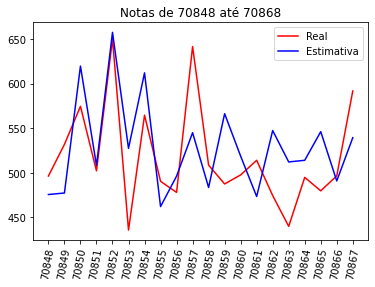

In [16]:
SIZE = 20
segmento = np.random.randint(len(y_test) - SIZE - 1)
s_test = y_test[segmento:segmento + SIZE]
s_pred = y_pred[segmento:segmento + SIZE]
xaxis = list(range(segmento, segmento + SIZE))
xaxis = [str(k) for k in xaxis]
plt.plot(xaxis, s_test, c='red', label='Real')
plt.plot(xaxis, s_pred, c='blue', label='Estimativa')
plt.legend()
plt.title('Notas de {} até {}'.format(segmento, segmento + SIZE))
plt.xticks(rotation=80);

In [15]:
rmse = MSE(y_pred, y_test) ** 0.5
print(rmse)

70.9543411664155
